In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from matplotlib.pyplot import cm 
import matplotlib.lines as mlines
from matplotlib import colors
import collections

# import seaborn.apionly as sns
# to import seaborn without bringing in styles

import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# plt.rcParams['font.family']='serif'

In [ ]:
##=============
## Porting in arrays from csv
##=============


csv = np.genfromtxt ('OptNIR_ALL.csv', delimiter=",")
spectype = csv[1:,5]
NIR_DIFF = csv[1:,13]
NIR_DIFF_grav = csv[1:,14]
SPLAT_DIFF = csv[1:,17]
SPLAT_DIFF_grav = csv[1:,18]

NIR_index=[]
SPLAT_index=[]

for ii in range(len(NIR_DIFF)) :
    if NIR_DIFF[ii] >= 0. :
        NIR_index.append(True)
    else:
        NIR_index.append(False)
NIR_index = np.array(NIR_index)

for jj in range(len(SPLAT_DIFF)) :
    if SPLAT_DIFF[jj] >= 0. :
        SPLAT_index.append(True)
    else:
        SPLAT_index.append(False)
SPLAT_index = np.array(SPLAT_index)

spectype_NIR = spectype[NIR_index]
NIR_DIFF = NIR_DIFF[NIR_index]
NIR_DIFF_grav = NIR_DIFF_grav[NIR_index]

spectype_SPLAT = spectype[SPLAT_index]
SPLAT_DIFF = SPLAT_DIFF[SPLAT_index]
SPLAT_DIFF_grav = SPLAT_DIFF_grav[SPLAT_index]

In [ ]:
cmap = colors.ListedColormap(['purple', 'blue'])


In [ ]:
##=============
## Scatterplots!
##=============

#NIR Measurements Plot

fig = plt.figure(figsize=(8,5))

sc = plt.scatter(spectype_NIR, NIR_DIFF, c=NIR_DIFF_grav, s=60, cmap=cmap, alpha=0.4)
plt.colorbar(sc, ticks=[0,1])
plt.title("Difference Between This Paper and NIR Measurements")
plt.xlabel("Spectral Type")
plt.ylabel("Difference in Type Number")

In [ ]:
#SPLAT Measurements Plot

fig = plt.figure(figsize=(8,5))
# s = [1.1*1.3**n for n in range(0,30)]

ab = plt.scatter(spectype_SPLAT, SPLAT_DIFF, c=SPLAT_DIFF_grav, s=60, cmap=cmap, alpha=0.4)
plt.colorbar(ab, ticks=[0,1])
plt.title("Difference Between This Paper and SPLAT Measurements")
plt.xlabel("Spectral Type")
plt.ylabel("Difference in Type Number")

In [ ]:
# To create the above plot, but with different sizes and opacities per occurence, /
# I can create different arrays according to how many dots are at each point!

# To start I need to find the occurence of each x,y value

for ii in [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]:
    how_many=len(SPLAT_DIFF[L8_index][SPLAT_DIFF[L8_index]==ii])

# Now I need to find a way to sort out arrays, we have anywhere from 1-15 occurences (with blanks for  9,10,12) /
# And I want to sort arrays that are still sorted by color and according to number of occurences

s = [20*2**n for n in range(0,15)]

# The sizing is tricky an grows either too quickly or too slowly. I will work on that. /
# For now I'm going to try seaborn's swarm plot

sns.swarmplot(x=spectype_SPLAT, y=SPLAT_DIFF, hue=SPLAT_DIFF_grav, palette=['purple', 'blue'])
plt.title("Difference Between This Paper and SPLAT Measurements")
plt.xlabel("Spectral Type")
plt.ylabel("Difference in Type Number")

In [ ]:
##=============
## Histograms!
##=============

fig = plt.figure(figsize=(8,5))

colors = ['lime', 'yellow']
labels = ['SPLAT Diff', 'NIR Diff']
plt.hist([SPLAT_DIFF, NIR_DIFF], bins=16, normed=False, stacked=True, color=colors, label=labels)
plt.legend()

plt.xlabel("Difference Between Spectral Types")
plt.ylabel("Frequency")

# ax0.legend(prop={'size': 10})

In [ ]:
# I want to figure out how to divide the SPLAT differences into spectral type by color in a stacked histogram

# print spectype_SPLAT, SPLAT_DIFF

fig = plt.figure(figsize=(8,5))

L0_index=np.where(spectype_SPLAT == 10.)
L1_index=np.where(spectype_SPLAT == 11.)
L2_index=np.where(spectype_SPLAT == 12.)
L3_index=np.where(spectype_SPLAT == 13.)
L4_index=np.where(spectype_SPLAT == 14.)
L5_index=np.where(spectype_SPLAT == 15.)
L6_index=np.where(spectype_SPLAT == 16.)
L7_index=np.where(spectype_SPLAT == 17.)
L8_index=np.where(spectype_SPLAT == 18.)

colors=[]
for i in range(0,9):
    colors.append(cm.gist_rainbow(1.*i/9))

arrays = [SPLAT_DIFF[L0_index], SPLAT_DIFF[L1_index], SPLAT_DIFF[L2_index], SPLAT_DIFF[L3_index], SPLAT_DIFF[L4_index], SPLAT_DIFF[L5_index], SPLAT_DIFF[L6_index], SPLAT_DIFF[L7_index], SPLAT_DIFF[L8_index]]
labels = ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8']
plt.hist(arrays , bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7], normed=False, stacked=True, label=labels, color=colors)
plt.legend()

plt.xlabel("Difference Between This Paper and SPLAT Spectral Types")
plt.ylabel("Frequency")

In [2]:
csv = np.genfromtxt ('OptNIR_modified.csv', delimiter=",", dtype=str)
OPT_spectype = csv[1:,7]
NIR_spectype = csv[1:,21]
g_diff = csv[1:,22]

# print(OPT_spectype, NIR_spectype)

In [3]:
NIR_spectype_nog = []
OPT_spectype_nog = []
for ii in range(len(NIR_spectype)):
    obj = NIR_spectype[ii]
    obj2 = OPT_spectype[ii]
    NIR_spectype_nog.append(int(obj[:2]))
    OPT_spectype_nog.append(int(obj2[:2]))

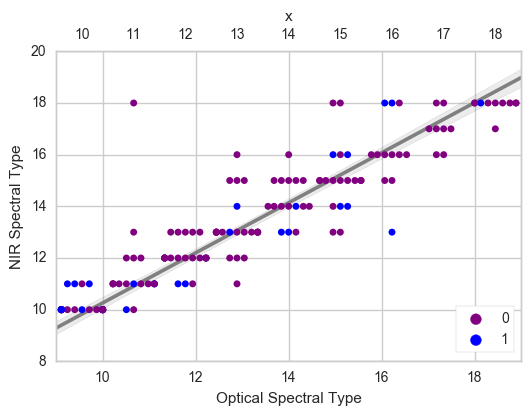

In [18]:
# y=np.array([10,18])
# x=y

#I thought this would allow a trend line, does not, instead will try to for loop with if statements for opacity

# for x,y in zip(OPT_spectype_nog, NIR_spectype_nog):
#     if y == x:
#         x_data=x
#         y_data=y
#         sns.swarmplot(x=x_data, y=y_data, alpha=0.5)
#     if y == x+1 or y == x-1:
#         sns.swarmplot(x=OPT_spectype_nog, y=NIR_spectype_nog, hue=g_diff, palette=['purple', 'blue'], alpha=0.65)
#     if y > x+1 or y < x-1:
#         sns.swarmplot(x=OPT_spectype_nog, y=NIR_spectype_nog, hue=g_diff, palette=['purple', 'blue'], alpha=0.3)

import pandas as pd
df = pd.DataFrame({"x":OPT_spectype_nog,"y":NIR_spectype_nog} )

fig, ax = plt.subplots()
ax2 = ax.twiny()
sns.swarmplot(x="x", y="y", data= df, hue=g_diff, palette=['purple', 'blue'], ax=ax2)
sns.regplot(y="y", x="x", data= df, color='grey', scatter_kws={"alpha" : 0.0},  ax=ax)
ax2.grid(False)

ax2.legend(bbox_to_anchor=(1, 0.2), frameon='True')
ax.set_xlabel("Optical Spectral Type")
ax.set_ylabel("NIR Spectral Type")

sns.plt.show()

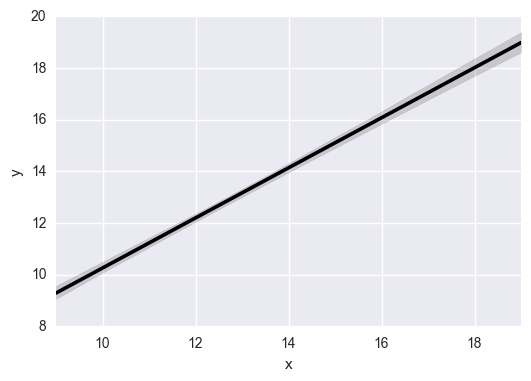

In [7]:
sns.regplot(y="y", x="x", data= df, color='k', scatter_kws={"alpha" : 0.0})